In [1]:
from IPython.display import display, HTML, Markdown
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("""<style>
div.CodeMirror, div.CodeMirror pre, div.CodeMirror-code,
div.output_area pre, div.output_wrapper pre,
.text_cell_render, .text_cell_render *
{ font-family: Consolas; font-size: 15pt; line-height: 140%;}
</style>"""))

# 제출 방법
1. 파일 이름에서 '이름'을 자신의 이름으로 고치시오.
1. 제출 후 삭제하시오.


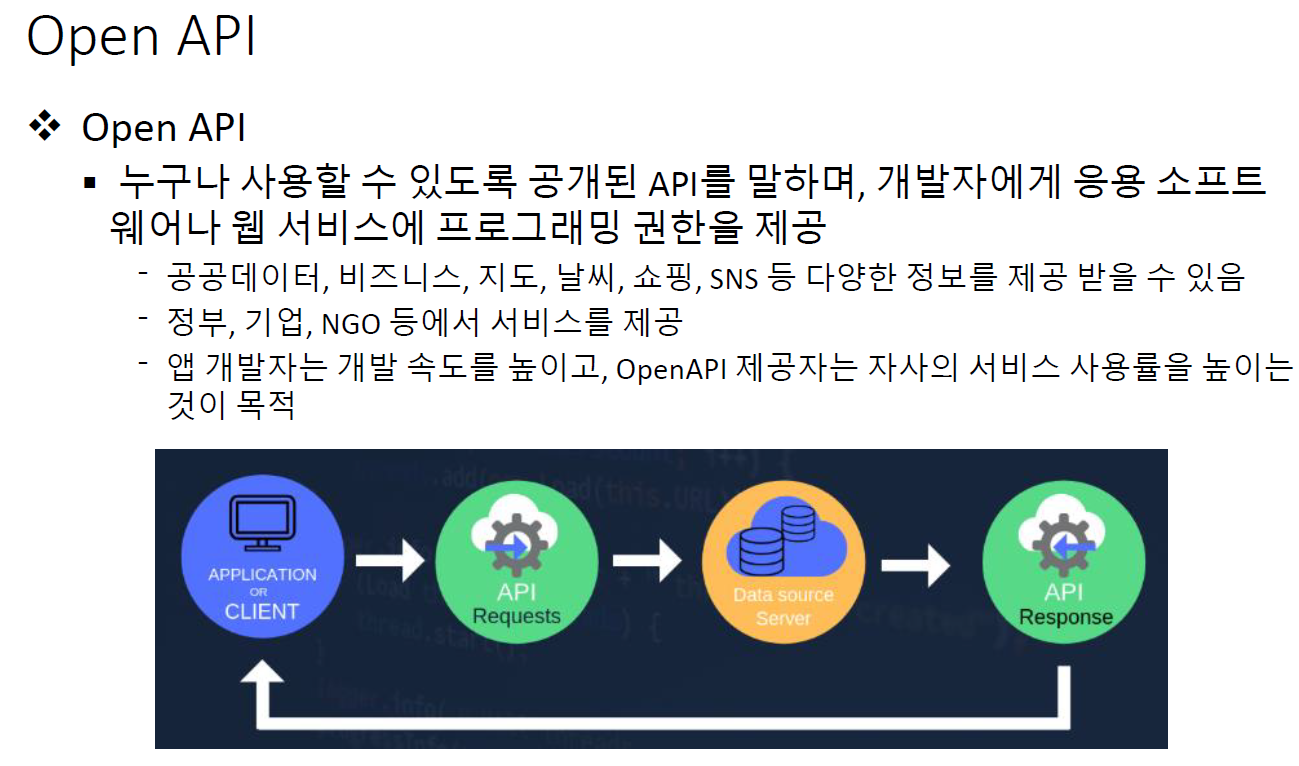

# 실습1

아래 네이버 파파고 번역 OpenAPI 문서를 참조하여 한글을 영어로 번역하시오.

https://developers.naver.com/docs/papago/papago-nmt-overview.md


- API를 요청할 때 다음 예와 같이 HTTP 요청 헤더에 클라이언트 아이디와 클라이언트 시크릿을 추가해야 합니다.

```
POST /v1/papago/n2mt HTTP/1.1
HOST: openapi.naver.com
User-Agent: curl/7.49.1
Accept: */*
Content-Type: application/x-www-form-urlencoded; charset=UTF-8
X-Naver-Client-Id: {애플리케이션 등록 시 발급받은 클라이언트 아이디 값}
X-Naver-Client-Secret: {애플리케이션 등록 시 발급받은 클라이언트 시크릿 값}
Content-Length: 51
```
- 응답 예
```json
{
    "message": {
        "@type": "response",
        "@service": "naverservice.nmt.proxy",
        "@version": "1.0.0",
        "result": {
            "srcLangType":"ko",
            "tarLangType":"en",
            "translatedText": "tea"
        }
    }
}
```

***결과***
```
['고생하셨습니다.', '건강 조심하세요.', '다음 학기에 만나요.']
```


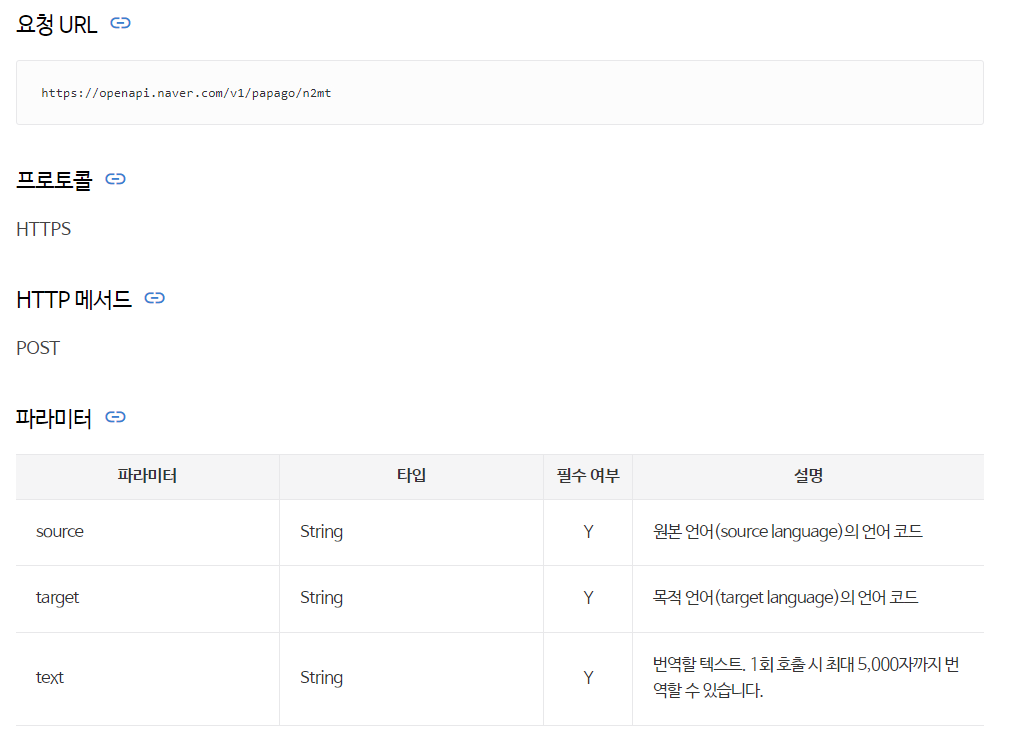

In [2]:
import requests as rq

def trans_list(text_list):
    client_id = "krhM6JH6sLvevhNHpMpd" # 바꾸기
    client_secret = "6a0hkVlPRu"       # 바꾸기
    results = []
    
    for org_text in text_list:
        # API url
        api_url = "https://openapi.naver.com/v1/papago/n2mt"
        
        # 요청 데이터 만들기 (API 요청 파라미터 확인)
        data = {
            'source' : 'en',
            'target' : 'ko',
            'text' : org_text.encode('utf-8')
        }

        # 요청 헤드 만들기 (API ID와 비밀번호가 들어감)
        headers = {
            'X-Naver-Client-Id': client_id,
            'X-Naver-Client-Secret': client_secret
                                        }
        
        # HTTP post 요청
        res = rq.post(api_url, data=data, headers=headers)

        res_data = res.json() # 받은 json 데이터를 사전형식으로 변환
        
        # 번역될 결과를 리스트로 만들기
        if res.status_code == 200:
            result = res_data['message']['result']['translatedText']
            results.append(result)
        else:
            print ("Error Code:", res.status_code)
            
    return results


print(trans_list(['Thank you for your efforts.', "Take care of your health.", "See you next semester."]))

['고생하셨습니다.', '건강 조심하세요.', '다음 학기에 만나요.']


# 실습2
아래 네이버 쇼핑 OpenAPI를 이용하여 쇼핑 검색 목록을 구하시오.

5개의 쇼핑 목록을 출력하시오.( 번호, 최저가, 제목 출력)

https://developers.naver.com/docs/serviceapi/search/shopping/shopping.md#%EC%87%BC%ED%95%91

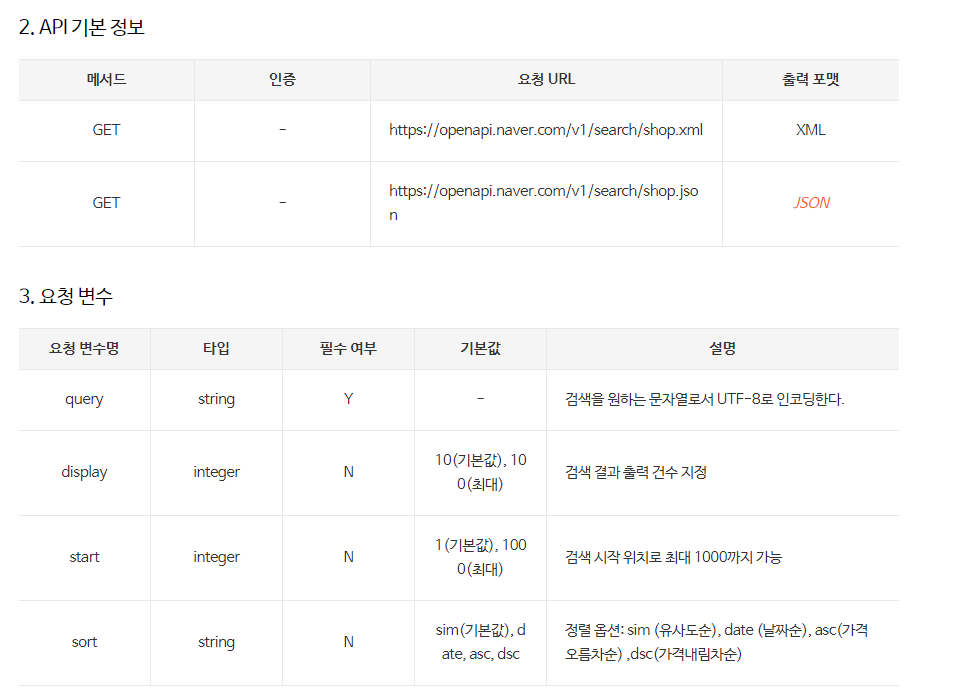

***결과***
```
query=%EC%A0%9C%EC%A3%BC%EB%8F%84+%EC%9B%94%EC%A0%95%EB%A6%AC&display=5&start=1&sort=sim
https://openapi.naver.com/v1/search/shop.json?query=%EC%A0%9C%EC%A3%BC%EB%8F%84+%EC%9B%94%EC%A0%95%EB%A6%AC&display=5&start=1&sort=sim
[1] [950000원] <b>제주 월정리</b> 마커스마운틴 630평독채
    https://search.shopping.naver.com/gate.nhn?id=82085397993
[2] [100800원] 제주시 [제주시] <b>제주 월정리</b>바다향기펜션
    https://search.shopping.naver.com/gate.nhn?id=21718602088
[3] [126000원] [제주 펜션] <b>제주 월정리</b>바다향기펜션 (제주 여행)
    https://search.shopping.naver.com/gate.nhn?id=37254265855
[4] [435000원] 씨에코비치 20평 자스민+K9 제주도에어카텔 <b>제주도월정리</b>숙소
    https://search.shopping.naver.com/gate.nhn?id=24327277432
[5] [112000원] 제주 /  <b>제주 월정리</b>바다향기펜션 / 마커스오션3
    https://search.shopping.naver.com/gate.nhn?id=33069609668
```

In [23]:
import requests
from urllib.parse import urlencode

client_id = 'krhM6JH6sLvevhNHpMpd' # 바꾸기
client_secret = '6a0hkVlPRu' # 바꾸기
search_text = "제주도 월정리"

api_url = 'https://openapi.naver.com/v1/search/shop.json'

# 요청 데이터
data = {
    'query' : search_text.encode('utf-8')
}

# 요청 헤더
headers = {
    'X-Naver-Client-Id': client_id,
    'X-Naver-Client-Secret': client_secret
}

# GET 요청 url 만들기
request_url = api_url + "?" + urlencode(data)
print(urlencode(data)) # 쿼리스트링(데이터) 출력해 보기
print(request_url)

# GET 요청
res = rq.get(request_url, headers=headers)

# 목록 출력
if res.status_code == 200:
    res_data = res.json() # json -> dict
    for i, item in enumerate(res_data['items'], 1):
        print(f"[{i}] [{item['lprice']}원] {item['title']}")
        print(f"{item['link']}")
else:
    print ("Error Code:", res.status_code)

query=%EC%A0%9C%EC%A3%BC%EB%8F%84+%EC%9B%94%EC%A0%95%EB%A6%AC
https://openapi.naver.com/v1/search/shop.json?query=%EC%A0%9C%EC%A3%BC%EB%8F%84+%EC%9B%94%EC%A0%95%EB%A6%AC
[1] [136000원] 제주 /  <b>제주 월정리</b>바다향기펜션 / 마커스오션6
https://search.shopping.naver.com/gate.nhn?id=33069800258
[2] [219000원] [<b>제주</b> 펜션] <b>제주</b> 틴더타운리조트(<b>월정리</b>,신규오픈)
https://search.shopping.naver.com/gate.nhn?id=31628895279
[3] [107000원] 엠버호텔_바오젠(연동) 1박 제네시스DH 제주도항공권 <b>제주월정리</b>숙소
https://search.shopping.naver.com/gate.nhn?id=17783521560
[4] [950000원] <b>제주 월정리</b> 마커스마운틴 630평독채
https://search.shopping.naver.com/gate.nhn?id=82085397993
[5] [150000원] [제주 펜션] <b>제주 월정리</b>섯동네펜션
https://search.shopping.naver.com/gate.nhn?id=31628868113
[6] [108000원] 제주시 [제주시] <b>제주 월정리</b>바다향기펜션
https://search.shopping.naver.com/gate.nhn?id=21718602088
[7] [139680원] [제주 펜션] <b>제주 월정리</b>바다향기펜션 (제주 여행)
https://search.shopping.naver.com/gate.nhn?id=37254265855
[8] [144000원] [제주 펜션] <b>제주 월정리</b>바다향기펜션
https://search.shopping.naver.com